## Mountain car

> **Problem**: Get mountain car from valley to the flag on top of the hill.

First import required libraries:

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import random

## Create a mountain car environment

In [2]:
env = gym.make("MountainCar-v0")

print(env.action_space)
print(env.observation_space)
print(env.action_space.sample())

Discrete(3)
Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
0


To see how the environment works, let's run a short simulation for 100 steps.

In [5]:
env.reset()

for i in range(100):
    env.render()
    env.step(env.action_space.sample())
env.close()

During simulation, we need to get observations in order to decide how to act. In fact, `step` function returns us back current observations, reward function, and the `done` flag that indicates whether it makes sense to continue the simulation or not:

In [6]:
env.reset()

done = False
while not done:
   env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   print(f"{obs} -> {rew}")
env.close()

[-0.41528794 -0.00080382] -> -1.0
[-0.41588986 -0.00060194] -> -1.0
[-0.41828564 -0.00239577] -> -1.0
[-0.42045817 -0.00217254] -> -1.0
[-0.42439198 -0.00393381] -> -1.0
[-0.4290589  -0.00466693] -> -1.0
[-0.43342543 -0.00436651] -> -1.0
[-0.43746    -0.00403459] -> -1.0
[-0.44313347 -0.00567346] -> -1.0
[-0.45040458 -0.00727111] -> -1.0
[-0.45922026 -0.00881566] -> -1.0
[-0.46751577 -0.00829551] -> -1.0
[-0.4772299  -0.00971415] -> -1.0
[-0.4862907  -0.00906079] -> -1.0
[-0.49463072 -0.00834002] -> -1.0
[-0.5031877  -0.00855701] -> -1.0
[-0.51289773 -0.00971   ] -> -1.0
[-0.52368796 -0.01079024] -> -1.0
[-0.5354775  -0.01178957] -> -1.0
[-0.54717803 -0.0117005 ] -> -1.0
[-0.55970186 -0.0125238 ] -> -1.0
[-0.57295537 -0.01325356] -> -1.0
[-0.58684015 -0.01388473] -> -1.0
[-0.6002534  -0.01341326] -> -1.0
[-0.6130968  -0.01284341] -> -1.0
[-0.626277   -0.01318021] -> -1.0
[-0.63769925 -0.01142224] -> -1.0
[-0.64728236 -0.0095831 ] -> -1.0
[-0.656959   -0.00967662] -> -1.0
[-0.66666186 -

We can get min and max value of those numbers:

In [7]:
print(env.observation_space.low)
print(env.observation_space.high)

[-1.2  -0.07]
[0.6  0.07]


## State Discretization

In [8]:
def discretize(x):
    return tuple((x/np.array([0.05, 0.004])).astype(int ))

Let's also explore other discretization method using bins:

In [9]:
def create_bins(i, num):
    return np.arange(num+1)*(i[1]-i[0])/num+i[0]

print("Sample bins for interval (-5,5) with 10 bins\n",create_bins((-5,5),10))

ints = [(-5,5),(-2,2),(-0.5,0.5),(-2,2)] # intervals of values for each parameter
nbins = [20,20,10,10] # number of bins for each parameter
bins = [create_bins(ints[i],nbins[i]) for i in range(4)]

def discretize_bins(x):
    return tuple(np.digitize(x[i],bins[i]) for i in range(4))

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Let's now run a short simulation and observe those discrete environment values.

In [10]:
env.reset()

done = False
while not done:
   env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   #print(discretize_bins(obs))
   print(discretize(obs))
env.close()

(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, 0)
(-10, -1)
(-10, 0)
(-10, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-11, 0)
(-10, 0)
(-10, 1)
(-10, 1)
(-10, 1)
(-10, 1)
(-10, 0)
(-10, 0)
(-10, 1)
(-10, 1)
(-10, 1)
(-10, 1)
(-9, 1)
(-9, 1)
(-9, 0)
(-9, 1)
(-9, 1)
(-9, 1)
(-9, 1)
(-9, 0)
(-9, 0)
(-9, 0)
(-9, 0)
(-9, 0)
(-9, 0)
(-9, 0)
(-9, 0)
(-9, -1)
(-9, 0)
(-9, -1)
(-9, -1)
(-9, -1)
(-10, -1)
(-10, -1)
(-10, -1)
(-10, -1)
(-10, -1)
(-10, -1)
(-10, -1)
(-10, -1)
(-11, -1)
(-11, -2)
(-11, -2)
(-11, -2)
(-11, -2)
(-11, -1)
(-12, -1)
(-12, -1)
(-12, -1)
(-12, -1)
(-12, -1)
(-12, -1)
(-12, -1)
(-12, 0)
(-12, 0)
(-12, 0)
(-12, 0)
(-12, 0)
(-12, 1)
(-12, 1)
(-12, 2)
(-12, 2)
(-12, 2)
(-11, 2)
(-11, 2)
(-11, 2)
(-11, 3)
(-10, 2)
(-10, 2)
(-10, 2)
(-10, 2)
(-10, 2)
(-9, 2)
(-9, 2)
(-9, 2

## Q-Table Structure

In [45]:
Q = {}
actions = (0, 1, 2) 
# 0 -> Accelerate to the left
# 1 -> Do not accelerate
# 2 -> Accelerate to the right

def qvalues(state):
    return [Q.get((state, a), 0) for a in actions]

## Let's Start Q-Learning!

In [44]:
epochs = 40000

alpha = 1       # learning rate
gamma = 0.95    # discount factor
epsilon = 0.1     # exploitation factor

epsilon_inc = 1 / 10000      # reate of increasing for epsilon
alpha_dec = 1 / 20000       # rate of decreasing for alpha

In [46]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

Qmax = -200
Qbest = Q
cum_rewards = []
rewards = []
for epoch in range(epochs):
    obs = env.reset()
    done = False
    cum_reward=0
    # == do the simulation ==
    while not done:
        s = discretize(obs)
        if random.random()<epsilon:
            # exploitation - chose the action according to Q-Table probabilities
            v = probs(np.array(qvalues(s)))
            a = actions[np.argmax(v)]
        else:
            # exploration - randomly chose the action
            a = np.random.randint(env.action_space.n)

        obs, rew, done, info = env.step(a)

        cum_reward += rew

        ns = discretize(obs)
        Q[(s,a)] = (1 - alpha) * Q.get((s,a),0) + alpha * (rew + gamma * max(qvalues(ns)))
        
    cum_rewards.append(cum_reward)
    rewards.append(cum_reward)
    # == Periodically print results and calculate average reward ==
    if epoch%500==0:
        print(f"{epoch}: {np.average(cum_rewards)}, alpha={alpha}, epsilon={epsilon}")

        if np.average(cum_rewards) > Qmax:
            Qmax = np.average(cum_rewards)
            Qbest = dict(Q)
        Q = dict(Qbest)
        cum_rewards=[]

    # increase epsilon to ceratin limit, this way we start with more exploitation
    if epsilon < 0.9:
        epsilon += epsilon_inc

    # decrease learning rate, so we adjust Q table less with more iterations
    if alpha > 0.2:
        alpha -= alpha_dec

0: -200.0, alpha=1, epsilon=0.1
500: -200.0, alpha=0.9750000000000028, epsilon=0.14999999999999797
1000: -200.0, alpha=0.9500000000000055, epsilon=0.19999999999999246
1500: -200.0, alpha=0.9250000000000083, epsilon=0.24999999999998695
2000: -200.0, alpha=0.900000000000011, epsilon=0.29999999999998145
2500: -200.0, alpha=0.8750000000000138, epsilon=0.34999999999997594
3000: -200.0, alpha=0.8500000000000165, epsilon=0.39999999999997043
3500: -200.0, alpha=0.8250000000000193, epsilon=0.44999999999996493
4000: -200.0, alpha=0.800000000000022, epsilon=0.4999999999999594
4500: -200.0, alpha=0.7750000000000248, epsilon=0.549999999999954
5000: -200.0, alpha=0.7500000000000275, epsilon=0.5999999999999485
5500: -200.0, alpha=0.7250000000000303, epsilon=0.649999999999943
6000: -200.0, alpha=0.700000000000033, epsilon=0.6999999999999375
6500: -200.0, alpha=0.6750000000000358, epsilon=0.7499999999999319
7000: -200.0, alpha=0.6500000000000385, epsilon=0.7999999999999264
7500: -200.0, alpha=0.6250000

## Plotting Training Progress

2129360929856
2129360951680


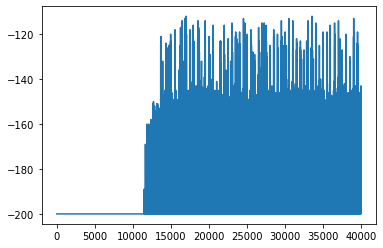

In [47]:
print(id(Qbest))
print(id(Q))

plt.plot(rewards)

From this graph, it is not possible to tell anything, because due to the nature of stochastic training process the length of training sessions varies greatly. To make more sense of this graph, we can calculate **running average** over series of experiments, let's say 100. This can be done conveniently using `np.convolve`:

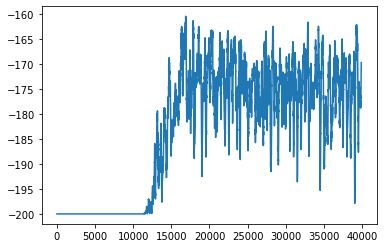

In [48]:
def running_average(x,window):
    return np.convolve(x,np.ones(window)/window,mode='valid')

plt.plot(running_average(rewards,100))

## Varying Hyperparameters and Seeing the Result in Action

Now it would be interesting to actually see how the trained model behaves. Let's run the simulation, and we will be following the same action selection strategy as during training: sampling according to the probability distribution in Q-Table: 

In [50]:
obs = env.reset()
done = False
while not done:
   s = discretize(obs)
   env.render()
   v = probs(np.array(qvalues(s)))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
env.close()

In this case we always select the case with highest qtable value:

In [52]:
obs = env.reset()
done = False
while not done:
   s = discretize(obs)
   env.render()
   v = probs(np.array(qvalues(s)))
   v_max = np.argmax(v)
   a = actions[v_max]
   obs,_,done,_ = env.step(a)
env.close()


## Saving result to an animated GIF

If you want to impress your friends, you may want to send them the animated GIF picture of the balancing pole. To do this, we can invoke `env.render` to produce an image frame, and then save those to animated GIF using PIL library:

In [25]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/mountain_car.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

152
